В этом файле оставляю только то, почему отказалась от функции `julia_monochrome`, где элементы вектора былои в формате `units`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, img_as_float
# img_as_float переводит имзображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a


from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
# нам особо это не нужно, используем imshow
import cv2

In [2]:
# Function to normalize an image
# в результате работы функции все значения ячейки матрицы распологаются от 0 до 1
# функция работает изображением, которое оно тоже воспринимает как матрицу
# функция делает нормализованные монохромные изображения (то есть двумерные массивы) 
# если мы делаем нормализованные трехмерные массивы для цветных изображений, то каждый слой надо нормализовать отдельно
# https://chat.openai.com/share/276a3f57-28a9-45b8-902a-8ddcc7053f4e 

def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

def norm_columns(x):
    columns_sums = np.sum(x, axis=0)
    columns_sums[columns_sums == 0] = np.finfo(float).eps
    # Убедимся, что нормализация применяется корректно
    return x / columns_sums[np.newaxis, :]

# поправила norm_rows, а то там появляется деление на ноль
def norm_rows(x):
    row_sums = np.sum(x, axis=1)
    # Замена нулей на очень маленькое число, чтобы избежать деления на ноль
    row_sums[row_sums == 0] = np.finfo(float).eps
    return x / row_sums[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c 
# for further explanation
# про массивы с ChatGPT https://chat.openai.com/share/403fcfae-85d5-411a-a7f4-363ab0228dcf 

In [3]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
mandrill_float = img_as_float(mandrill)
# то есть mandrill_float это уже матрица, где ячейки - это десятичные дроби от 0,00 до 1,00
mandrill.shape
mandrill_float.shape
mandrill.dtype

dtype('uint8')

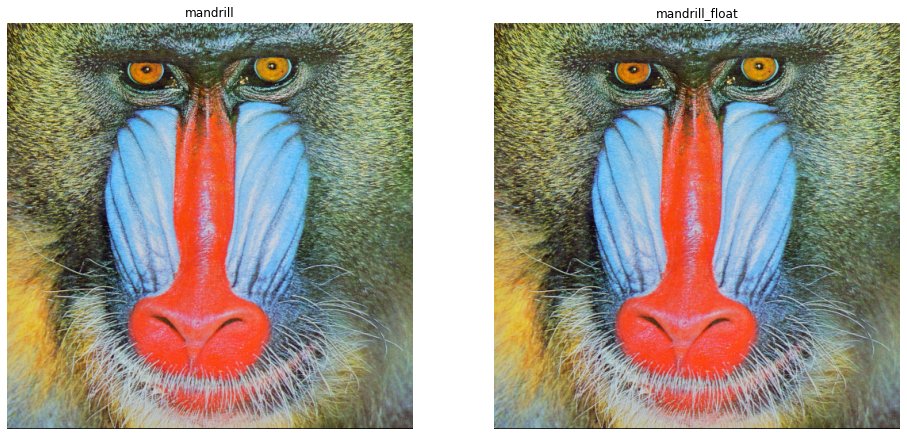

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Отображение первого изображения
axes[0].imshow(mandrill)
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('mandrill')

# Отображение второго изображения
axes[1].imshow(mandrill_float)
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('mandrill_float')

# Отображение фигуры с подграфиками
plt.show()

In [5]:
def julia_monochrome1(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #!!! Не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

def julia_monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #!!! Не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

In [6]:
def julia_monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)
    return rgb_image @ coeffs

 # coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard



После использования функции julia_monochrome:

минимальное значение в ячейке массива mandrill становится =  0.0 , максимальное значение в ячейке =  230.54299999999998


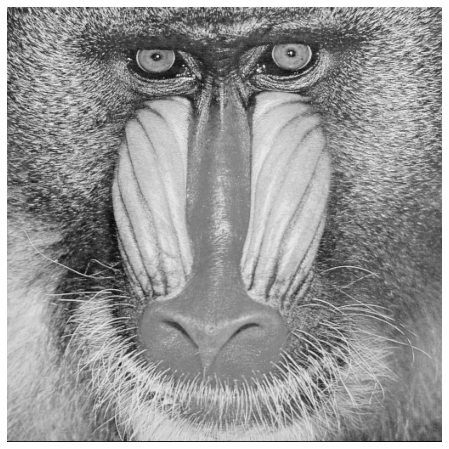

In [7]:
def julia_monochrome_1(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #В отличи от функции julia_monochrome, не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

# coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard

test_1 = julia_monochrome_1(mandrill)
print()
print("\033[1m" + "После использования функции julia_monochrome:" + "\033[0m")
print()

print('минимальное значение в ячейке массива mandrill становится = ', np.min(test_1), 
      ', максимальное значение в ячейке = ', np.max(test_1))

plt.figure(figsize=(8, 8))
plt.imshow(test_1, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()


In [8]:
# но если мы обрабатываем с помощью julia_monochrome изначальное изображение mandrill
# со значениями в ячейках от 0 до 255, происходит обнуление масива
print('минимальное значение в ячейке массива mandrill = ', np.min(mandrill), 
      ', максимальное значение в ячейке = ', np.max(mandrill))
test = julia_monochrome_1(mandrill)
print()
print("\033[1m" + "После использования функции julia_monochrome:" + "\033[0m")
print()

print('минимальное значение в ячейке массива mandrill становится = ', np.min(test), 
      ', максимальное значение в ячейке = ', np.max(test))

минимальное значение в ячейке массива mandrill =  0 , максимальное значение в ячейке =  255

После использования функции julia_monochrome:

минимальное значение в ячейке массива mandrill становится =  0.0 , максимальное значение в ячейке =  230.54299999999998


In [9]:
test_float = julia_monochrome(img_as_float(mandrill))
print('минимальное значение в ячейке массива mandrill после img_as_float становится = ', np.min(test_float), 
      ', максимальное значение в ячейке = ', np.max(test_float))
print('минимальное значение в ячейке массива mandrill после normalize_image становится = ', np.min(
    julia_monochrome(normalize_image(mandrill))), 
      ', максимальное значение в ячейке = ', np.max(julia_monochrome(normalize_image(mandrill))))
print('минимальное значение в ячейке массива mandrill если сначала  julia_monochrome, а потом normalize_image = ', np.min(
    normalize_image(julia_monochrome(mandrill))), 
      ', максимальное значение в ячейке = ', np.max(normalize_image(julia_monochrome_1(mandrill))))

минимальное значение в ячейке массива mandrill после img_as_float становится =  0.0 , максимальное значение в ячейке =  0.9040901960784312
минимальное значение в ячейке массива mandrill после normalize_image становится =  0.0 , максимальное значение в ячейке =  0.9040901960784312
минимальное значение в ячейке массива mandrill если сначала  julia_monochrome, а потом normalize_image =  nan , максимальное значение в ячейке =  1.0


C:\Users\cab\AppData\Local\Temp\ipykernel_14528\1444043833.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return (1 / np.max(im_res)) * im_res
C:\Users\cab\AppData\Local\Temp\ipykernel_14528\1444043833.py:10: RuntimeWarning: invalid value encountered in multiply
  return (1 / np.max(im_res)) * im_res


**Ну вот про пункт выше, что julia_monochrome не умеет работать с целыми, наверное. можно будет написать**

In [10]:
# если перед использованием функции julia_monochrome поменять тип ячеек на float 
# то все нормально
mandrill_to_float = mandrill.astype(float) 
m_test_float = julia_monochrome(mandrill_to_float)


print("\033[1m" + 'Если переводить в формат float до функции julia_monochrome' + "\033[0m") 
print('минимальное значение в ячейке массива становится = ', 
      np.min(m_test_float), ', максимальное значение в ячейке = ', np.max(m_test_float))
print()

m = julia_monochrome(mandrill_float)

print("\033[1m" +'Если применять функцию julia_monochrome уже к нормальзованному файлу' + "\033[0m") 
print('минимальное значение в ячейке массива становится = ', 
      np.min(m), ', максимальное значение в ячейке = ', np.max(m))

Если переводить в формат float до функции julia_monochrome
минимальное значение в ячейке массива становится =  0.0 , максимальное значение в ячейке =  230.54299999999998

Если применять функцию julia_monochrome уже к нормальзованному файлу
минимальное значение в ячейке массива становится =  0.0 , максимальное значение в ячейке =  0.9040901960784312


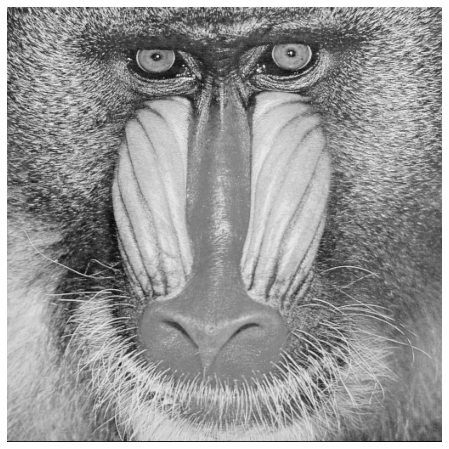

In [11]:
# соответсвенно, если julia_monochrome применяется после перевода формата во float, все нормально отрисоаввается
plt.figure(figsize=(8, 8))
plt.imshow(julia_monochrome(mandrill.astype(float)), cmap = 'gray') 
           # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

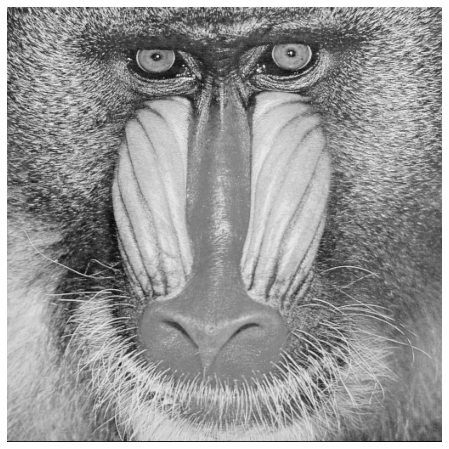

In [12]:
# с нормализованным файлом функция julia_monochrome тоже работает правильно им все отрисовывается

plt.figure(figsize=(8, 8))
plt.imshow(m, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

**Итого**:

Функция `julia_monochrome` работает с любым трёхмерным массивом, у которого последнее измерение имеет размер 3 и переводит его в двумерный с помощью линейного преобразования. 

Реально используется для перевода цветного изображения в черно-белое.  

[обсуждение возможностей функции julia_monochrome с ChatGPT](https://chat.openai.com/share/2be730c2-f49f-4fa0-8197-ece29060ea48)

Функция работает только с теми трехмерными массивами, у которых ячейки числа в формате float. Иначе получается массив только из нулевых элементов. 

Это происходит потому, что если числа исходного массива имеют формат uint8, то строчка в функции coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype) создает нулевой вектор. Потому что при пренобразовании в формат unit8 все дробные части теряются. А умножение на нулевой вектор дает нулевую матрицу.

[Обсуждение проблемы применения функции julia_monochrome к матрицам с другими форматами ячеек](https://chat.openai.com/share/51671a2e-9a73-48bb-8ed7-fdf411210817)

При этом `julia_monochrome_1`, где команде `coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)` убрали  `dtype=rgb_image.dtype` и теперь там `coeffs = np.array([0.299, 0.587, 0.114])` все нормально работает

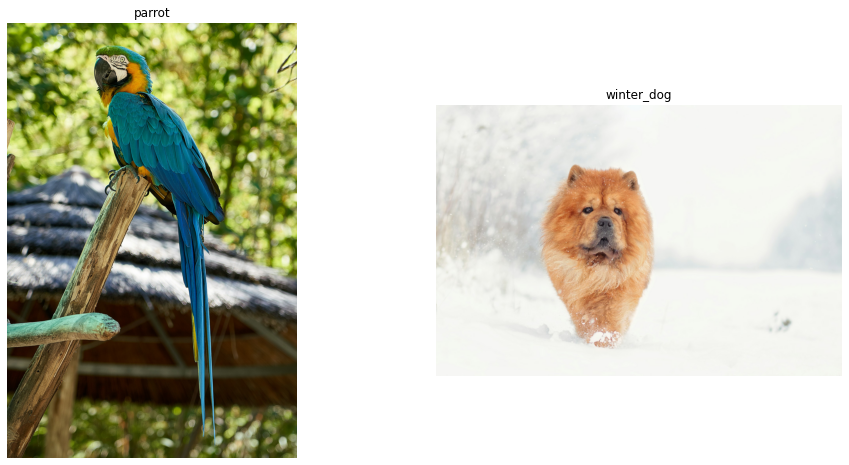

In [13]:
# попробуем еще на двух изображениях


parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Отображение первого изображения
axes[0].imshow(parrot)
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('parrot')

# Отображение второго изображения
axes[1].imshow(winter_dog)
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('winter_dog')

# Отображение фигуры с подграфиками
plt.show()

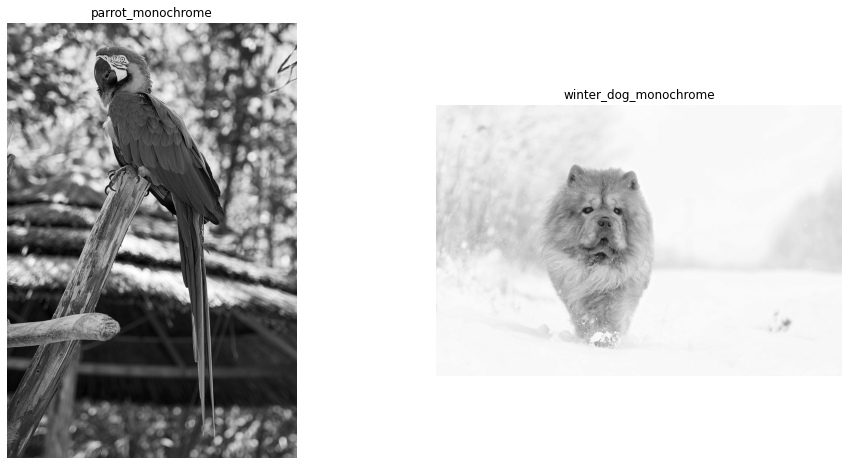

In [14]:
# Тоже с функцией julia_monochrome_1 все работаент нормально

parrot_monochrome = julia_monochrome_1(parrot)
winter_dog_monochrome = julia_monochrome_1(winter_dog)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Отображение первого изображения
axes[0].imshow(parrot_monochrome,  cmap = 'gray')
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('parrot_monochrome')

# Отображение второго изображения
axes[1].imshow(winter_dog_monochrome, cmap = 'gray')
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('winter_dog_monochrome')


plt.show()

In [15]:
def save_show(monochrome_image, file_name):
    monochrome_image_uint8 = (monochrome_image * 255).astype(np.uint8)
    cv2.imwrite(file_name, monochrome_image_uint8)
    display(Image(filename=file_name)) 
    
# display работает только после cv2.imwrite, потому что команда display работает с файлом, а не с массивом
# непосредственно display(Image(filename=(mandrill))) работать не будет

Функция `save_show` используется для перевода монохромного изображения в формате массива Numpy, где элементы это вещественные числа от 0 до 1 в массив  Numpy, где элементы массива находятся в формате unit8 (то есть беззнаковое число из 8 бит).
Ну и заодно показывает на экране получившееся изображение.

[подробное обсуждения функции save_show с ChatGPT](https://chat.openai.com/share/e66404bd-eb53-462e-a1e6-c3bd56e06627)

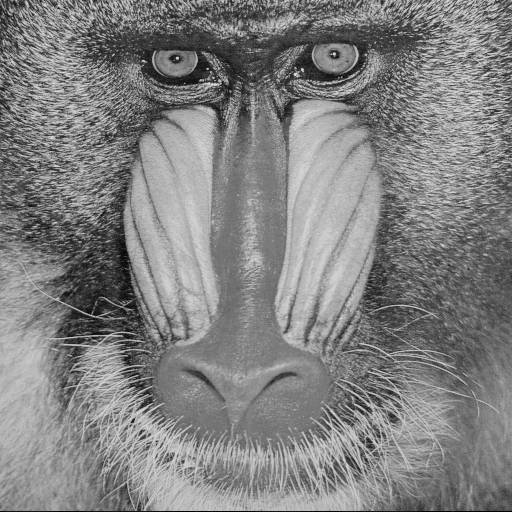

In [16]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
mandrill_float = img_as_float(mandrill)

m = julia_monochrome(mandrill_float)

save_show(m, 'gray_mandrill.png')

Но если мы используем функцию `julia_monochrome_1`, то нам не нужен `save_show`, `imshow` сам все отображает. 

**Выводы:**
- функция `julia_monochrome' работает только с теми трехмерными массивами, у которых ячейки числа в формате float. 
- измененная функция `julia_monochrome_1` не требует переформатирования массивов, поэтому она работает над изображениями до какой-либо их обработки
- `julia_monochrome_1` под названием `monochrome` будет использоваться дальше для перевода в монохромный режим. В частности, в файле , где умножение матриц на транспонированную и др (https://github.com/Chernobilsky/Mishka-project/blob/main/Drafts/image-transposition-and-multiplication.ipynb)
- соответсвенное, функция `save_show` нам тоже не нужна и использоваться не будет.